In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib import rc, rcParams
import os
import utils as ut
import tikzplotlib


In [13]:
def avg_fitness(filename, figsize=(20,10), ax=None):
    data = pd.read_csv(filename, ";", skiprows=1, index_col=False, names=csv_header);
    data = data.drop(['genome'], axis=1)
    print(data)
    avg = data.groupby(['generation']).mean()
    if (ax == None):
        fig, ax = plt.subplots(figsize=figsize)
    avg.plot(ax=ax)
    ax.set_title("Avg Fitness\n ")# + extract_title(filename))
    ax.grid()
    ax.set_xticks(np.arange(0, 101, step=1))
    return ax

def compare_avg_fitness(*filenames, figsize=(20,10), **kwargs):
    fig, ax = plt.subplots(figsize=figsize)
    legend_labels = []
    for filename in filenames:
        data = pd.read_csv(filename, ";", skiprows=1, index_col=False, names=csv_header)
        data = data.drop(['genome', 'score'], axis=1)
        avg = data.groupby(['generation']).mean()
        avg.plot(ax=ax, **kwargs)
        legend_labels.append(ut.legend_from_filename(filename).replace('\n', ' '))
    ax.set_title("Compare Avg Fitness\n ")
    ax.grid()
    #ax.set_xticks(np.arange(0, 81, step=1))
    ax.legend(labels=legend_labels)
    ax.set_xlabel("Generation")
    ax.set_ylabel("Performance")
    return data

def plot_test(*filenames, figsize=(25,10), outliers=True, **kwargs):
    finaldata = pd.DataFrame()
    for filename in filenames:
        data = pd.read_csv(filename, ";")
        data['info'] = np.full((len(data), 1), get_legend(filename, 'result_'))
        finaldata = finaldata.append(data)

    fig, ax = plt.subplots(figsize=figsize)
    bp = finaldata.boxplot('score', 'info', ax=ax, showfliers=outliers, notch=True, **kwargs)
    ax.set_title("Performance Test")
    ax.set_xlabel("Configurations")
    ax.set_ylabel("Performance")
    return bp

In [2]:
csv_header = ['generation', 'fitness', 'score', 'genome']
rcParams["axes.labelweight"] = "bold"
def set_size(width_pt, fraction=1, subplots=(1, 1)):
    """Set figure dimensions to sit nicely in our document.

    Parameters
    ----------
    width_pt: float
            Document width in points
    fraction: float, optional
            Fraction of the width which you wish the figure to occupy
    subplots: array-like, optional
            The number of rows and columns of subplots.
    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    # Width of figure (in pts)
    fig_width_pt = width_pt * fraction
    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    golden_ratio = (5**.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio * (subplots[0] / subplots[1])

    return (fig_width_in, fig_height_in)

In [3]:
def plot_avg_fitness(*filenames, title="Comparaison between fitness configuration", figsize=(20, 10), **kwargs):
    fig, ax = plt.subplots(figsize=figsize)
    legend_labels = []
    avgs = ut.avg_fitness_from_files(*filenames, csv_header=csv_header)
    
    for filename, fitness in zip(filenames, avgs):
        fitness.plot(ax=ax, **kwargs)
        legend_labels.append(ut.legend_from_filename(filename).replace('\n', ' '))

    ax.set_title(title,fontsize=16)
    ax.grid()
    ax.legend(labels=legend_labels, fontsize=14)
    ax.set_xlabel("Generazioni", fontsize=16)
    ax.xaxis.set_tick_params(labelsize=14)
    ax.set_ylabel("Fitness", fontsize=16)
    ax.yaxis.set_tick_params(labelsize=14)
    return fig

In [4]:
def plot_test(*filenames, title="Performance in test phase", figsize=(20,10), outliers=True, **kwargs):
    fig, ax = plt.subplots(figsize=figsize)
    df = pd.DataFrame()
    legends = []
    
    for number, filename in enumerate(filenames, start=1):
        data = pd.read_csv(filename, ";")
        data["info"] = np.full((len(data), 1), number) #np.full((len(data), 1), ut.legend_from_filename(filename, 'result_'))
        df = df.append(data)
        legends.append(mpatches.Patch(color=f"C{number-1}", label=ut.legend_from_filename(filename, 'result_').replace('\n', ' ')))

    box_colors = {'medians': 'black', 'whiskers': 'black'}
    axes = df.boxplot("score", "info", ax=ax, showfliers=outliers, notch=True, color=box_colors, patch_artist=True, **kwargs)
    for number in range(0, len(filenames)):
        axes.findobj(matplotlib.patches.Patch)[number].set_color(f"black")
        axes.findobj(matplotlib.patches.Patch)[number].set_facecolor(f"C{number}")
        
    
    fig.suptitle('')
    ax.legend(handles=legends)
    
    ax.set_title(title, fontsize=16)
    ax.set_xlabel("Configurazioni", fontsize=16)
    ax.xaxis.set_tick_params(labelsize=14)
    ax.set_ylabel("Fitness",  fontsize=16)
    ax.yaxis.set_tick_params(labelsize=14)
    return fig

## Task1

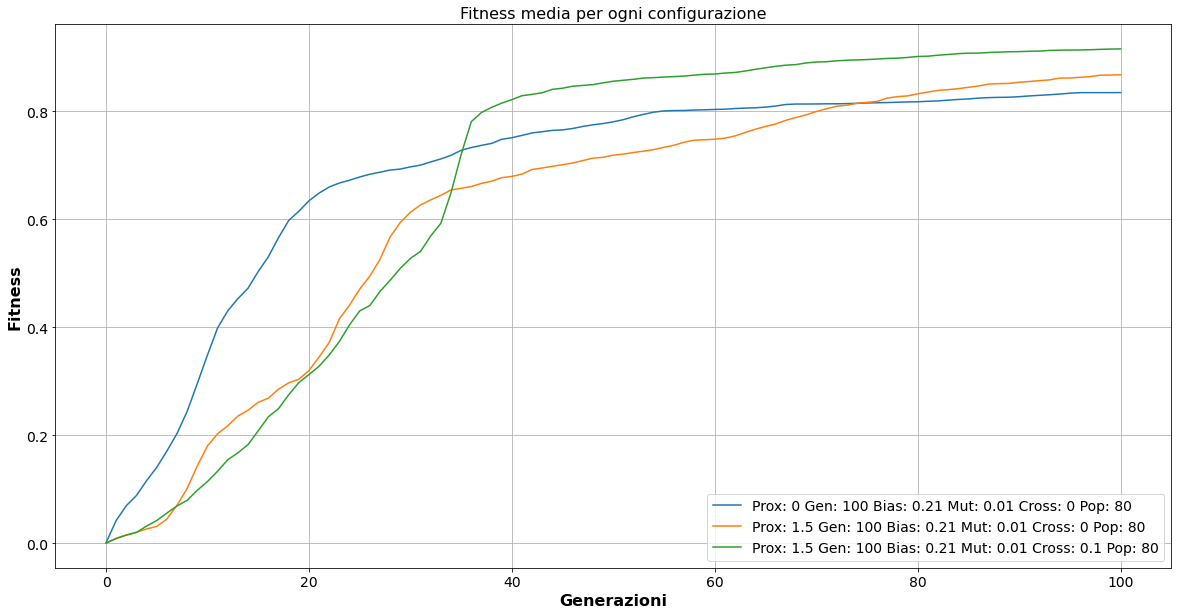

In [5]:
statistics_folder = r'collected-data/genetic/task1/'
fig = plot_avg_fitness(statistics_folder + "task1_nodes50_k3_bias0.21_prox0_p80_g100_pM0.01_pC0_el5_trials3_08-48_20-01.csv",
                 statistics_folder + "task1_nodes50_k3_bias0.21_prox1.5_p80_g100_pM0.01_pC0_el5_trials3_10-41_20-01.csv",
                 statistics_folder + "task1_nodes50_k3_bias0.21_prox1.5_p80_g100_pM0.01_pC0.1_el5_trials3_11-51_20-01.csv",
                 title="Fitness media per ogni configurazione")
fig.savefig("task1-fitness.pdf")

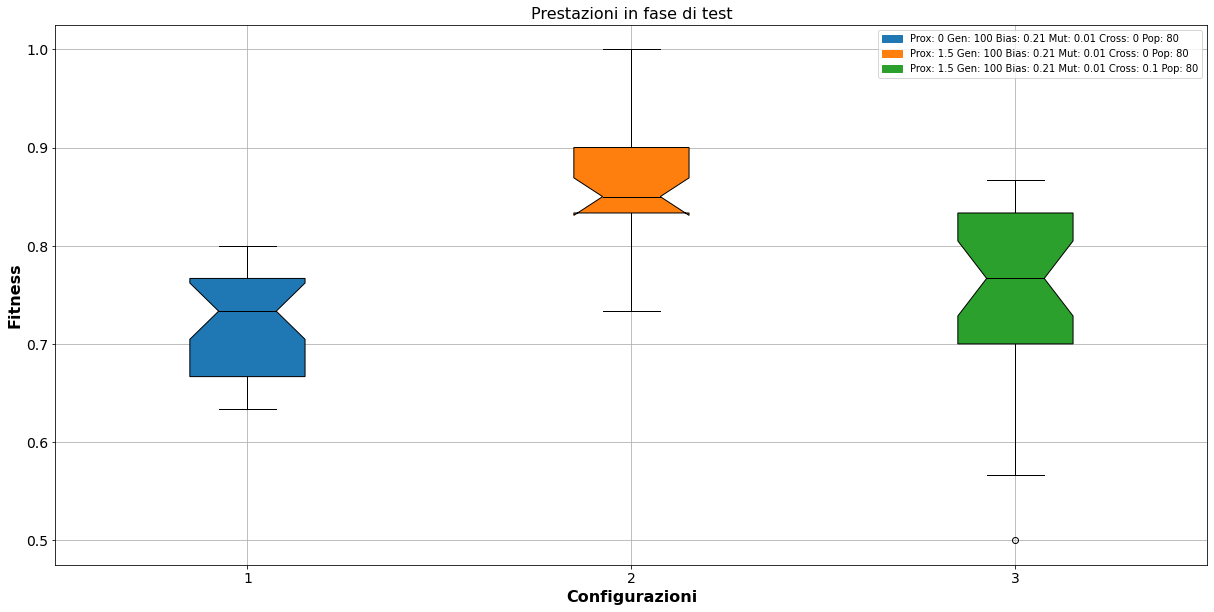

In [6]:
fig = plot_test(
    statistics_folder + "result_task1_nodes50_k3_bias0.21_prox0_p80_g100_pM0.01_pC0_el5_trials3_08-48_20-01_best_all.csv",
    statistics_folder + "result_task1_nodes50_k3_bias0.21_prox1.5_p80_g100_pM0.01_pC0_el5_trials3_10-41_20-01_best_all.csv",
    statistics_folder + "result_task1_nodes50_k3_bias0.21_prox1.5_p80_g100_pM0.01_pC0.1_el5_trials3_11-51_20-01_best_all.csv",
    title="Prestazioni in fase di test"
)
fig.savefig("task1-test.pdf")

# Task2

In [58]:
statistics_folder = r'collected-data/genetic/task2/'

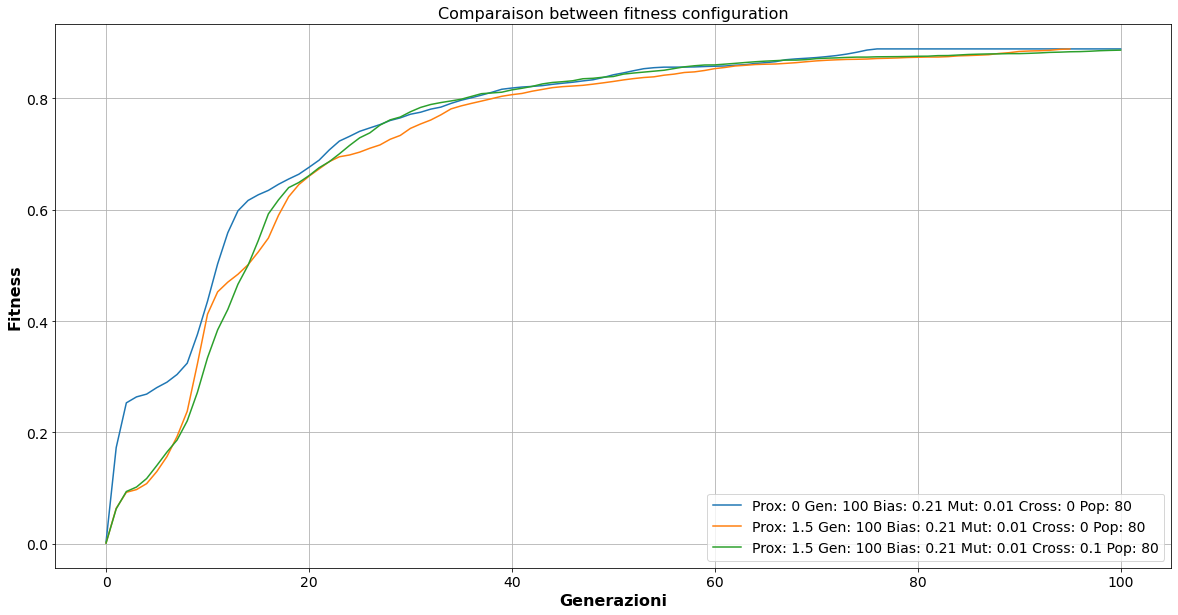

In [59]:
fig = plot_avg_fitness(
    #statistics_folder + "task2_nodes50_k3_bias0.21_prox1.5_p100_g80_pM0.01_pC0_el5_trials3_11-16_22-01.csv",
    #statistics_folder + "task2_nodes50_k3_bias0.21_prox1.5_p100_g80_pM0.01_pC0.1_el5_trials3_13-48_22-01.csv",
    #statistics_folder + "task2_nodes50_k3_bias0.21_prox0_p100_g80_pM0.01_pC0_el5_trials3_15-30_22-01.csv",
    statistics_folder + "task2_nodes50_k3_bias0.21_prox0_p80_g100_pM0.01_pC0_el5_trials3_17-18_22-01.csv",
    statistics_folder + "task2_nodes50_k3_bias0.21_prox1.5_p80_g100_pM0.01_pC0_el5_trials3_22-42_22-01.csv",
    statistics_folder + "task2_nodes50_k3_bias0.21_prox1.5_p80_g100_pM0.01_pC0.1_el5_trials3_10-20_15-02.csv"
    #statistics_folder + "task2_nodes50_k3_bias0.21_prox1.5_p80_g100_pM0.01_pC0_el5_trials3_22-42_22-01.csv"
)
fig.savefig('task2-fitness.pdf')

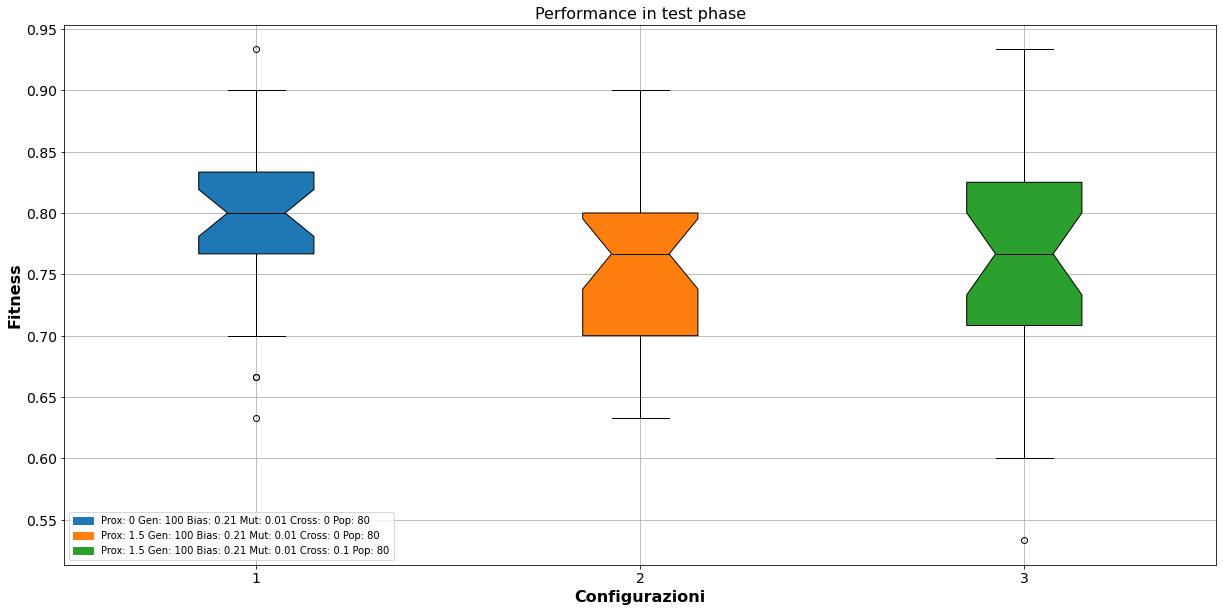

In [60]:
fig = plot_test(
    statistics_folder + "result_task2_nodes50_k3_bias0.21_prox0_p80_g100_pM0.01_pC0_el5_trials3_17-18_22-01.csv",
    statistics_folder + "result_task2_nodes50_k3_bias0.21_prox1.5_p80_g100_pM0.01_pC0_el5_trials3_22-42_22-01.csv",
    statistics_folder + "result_task2_nodes50_k3_bias0.21_prox1.5_p80_g100_pM0.01_pC0.1_el5_trials3_10-20_15-02.csv"
    #statistics_folder + "result_task2_nodes50_k3_bias0.21_prox0_p80_g100_pM0.01_pC0_el5_trials3_17-18_22-01.csv",
    #statistics_folder + "result_task2_nodes50_k3_bias0.21_prox1.5_p80_g100_pM0.01_pC0_el5_trials3_22-42_22-01.csv"
)
fig.savefig('task2-test.pdf')

## Task 3

In [46]:
statistics_folder = r'collected-data/genetic/task3/'

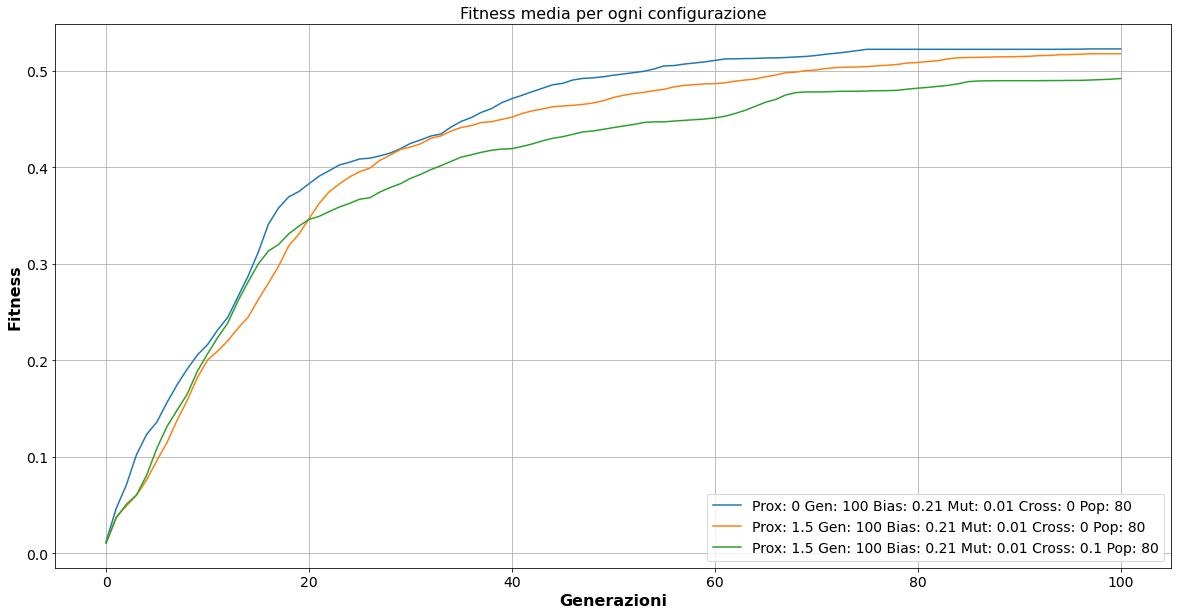

In [51]:
fig = plot_avg_fitness(
    statistics_folder + "task3_nodes50_k3_bias0.21_prox0_p80_g100_pM0.01_pC0_el5_trials3_12-30_23-01.csv",
    statistics_folder + "task3_nodes50_k3_bias0.21_prox1.5_p80_g100_pM0.01_pC0_el5_trials3_10-17_23-01.csv",
    #statistics_folder + "task3_nodes50_k3_bias0.21_prox0_p80_g100_pM0.01_pC0.1_el5_trials3_14-01_23-01.csv"
    statistics_folder + "task3_nodes50_k3_bias0.21_prox1.5_p80_g100_pM0.01_pC0.1_el5_trials3_21-16_24-01.csv",
    title="Fitness media per ogni configurazione"
)
fig.savefig("task4-fitness.pdf")

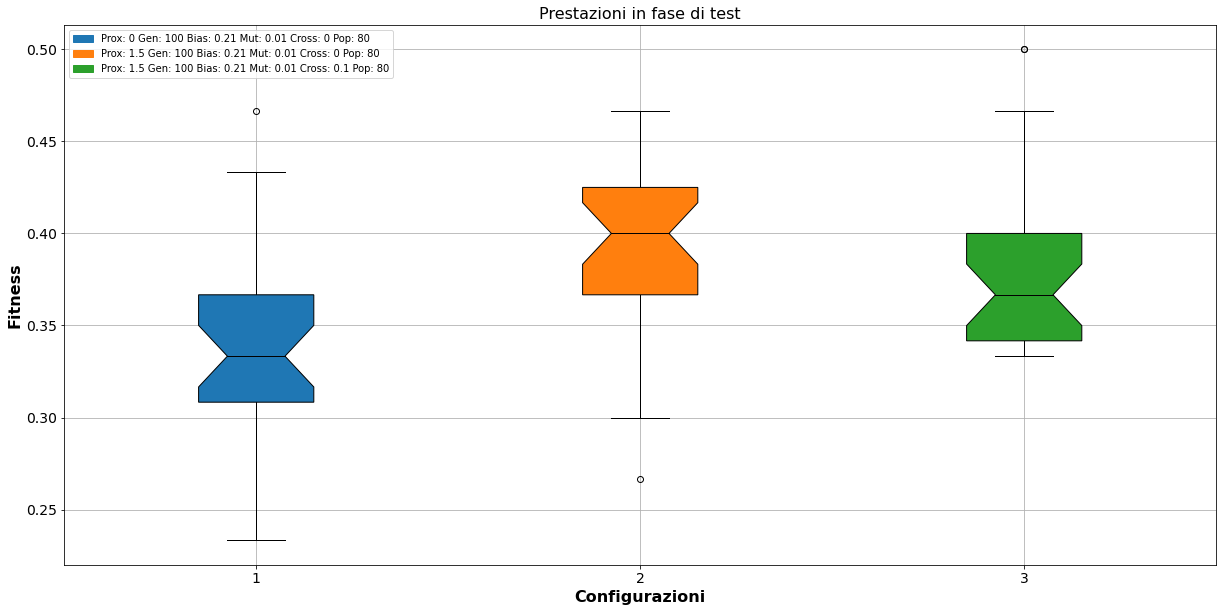

In [52]:
fig = plot_test(
    statistics_folder + "result_task3_nodes50_k3_bias0.21_prox0_p80_g100_pM0.01_pC0_el5_trials3_12-30_23-01.csv",
    statistics_folder+ "result_task3_nodes50_k3_bias0.21_prox1.5_p80_g100_pM0.01_pC0_el5_trials3_10-17_23-01.csv",
    statistics_folder +  "result_task3_nodes50_k3_bias0.21_prox1.5_p80_g100_pM0.01_pC0.1_el5_trials3_21-16_24-01.csv",
    title="Prestazioni in fase di test"
)
fig.savefig("task4-test.pdf")

## Task 4

In [42]:
statistics_folder = r'collected-data/genetic/task4/'

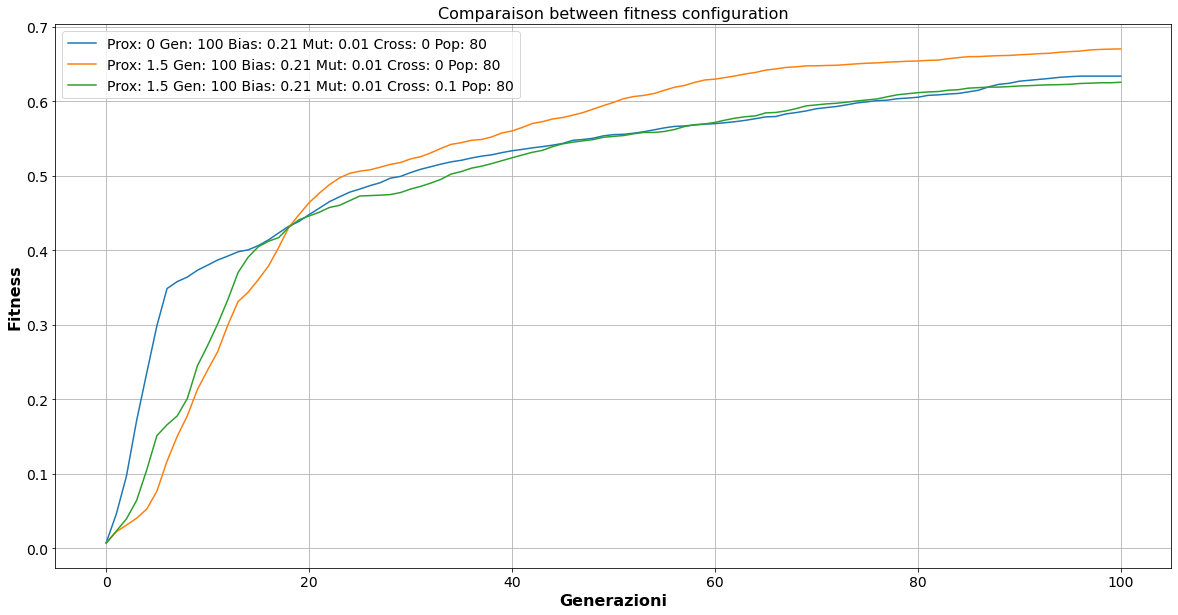

In [43]:
fig = plot_avg_fitness(
    statistics_folder + "task4_nodes50_k3_bias0.21_prox0_p80_g100_pM0.01_pC0_el5_trials3_19-52_26-01.csv",
    statistics_folder + "task4_nodes50_k3_bias0.21_prox1.5_p80_g100_pM0.01_pC0_el5_trials3_18-14_26-01.csv",
    #statistics_folder + "task4_nodes50_k3_bias0.21_prox0_p80_g100_pM0.01_pC0.1_el5_trials3_21-11_26-01.csv",
    statistics_folder + "task4_nodes50_k3_bias0.21_prox1.5_p80_g100_pM0.01_pC0.1_el5_trials3_22-24_26-01.csv"
    
)
fig.savefig('task3-fitness.pdf')

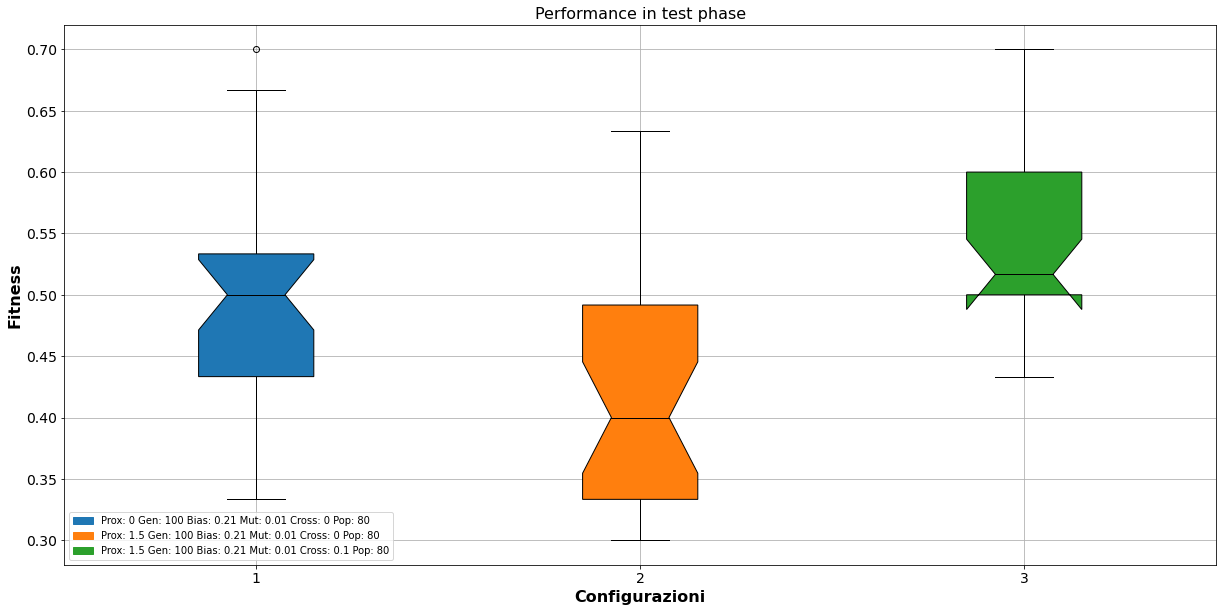

In [44]:
fig = plot_test(
    statistics_folder + "result_task4_nodes50_k3_bias0.21_prox0_p80_g100_pM0.01_pC0_el5_trials3_19-52_26-01.csv",
    statistics_folder + "result_task4_nodes50_k3_bias0.21_prox1.5_p80_g100_pM0.01_pC0_el5_trials3_18-14_26-01.csv",
    #statistics_folder + "result_task4_nodes50_k3_bias0.21_prox0_p80_g100_pM0.01_pC0.1_el5_trials3_21-11_26-01.csv",
    statistics_folder + "result_task4_nodes50_k3_bias0.21_prox1.5_p80_g100_pM0.01_pC0.1_el5_trials3_22-24_26-01.csv"
)
fig.savefig('task3-test.pdf')